## <center>Title: Investigation of the Original Wisconsin Breast Cancer Dataset</center>

https://www.kaggle.com/datasets/mariolisboa/breast-cancer-wisconsin-original-data-set

The original Wisconsin breast cancer dataset was created by dr. William H. Wolberg of the University of Wisconsin Hospitals. It is composed of 10 attributes and 699 instances. All instances are of one of two classes; "2" for benign (non-cancerous) or "4" for malignant (the presence of cancer). 16 Data points with missing values were removed leaving 683 instances in this version of the dataset. It is used for classification problems. A scale of number from 1 to 10 was used to indicate the degree of abnormality, with 10 the most abnormal:

In [1]:
import pandas as pd
datafr = pd.read_csv("tumor.csv")
datafr.head(30)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [2]:
datafr.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [3]:
datafr.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
datafr["Clump Thickness"].count()

683

<b>Bayesian Network Classifier:

This classifier assumes independence between variables. "A Bayesian network classifier is simply a Bayesian network applied to classification, that is, the prediction of the probability $P(c | x)$ of some discrete (class) variable C given some features $X$."
"A Bayesian network classifier is a Bayesian network used for predicting a discrete class variable C. It assigns x, an observation of n predictor variables (features) $X = (X1, . . . , Xn)$, to the most probable class:  $c∗ = arg maxP(c | x) = arg maxP(x, c)$.
"The classifier factorizes $P(x, c)$ according to a Bayesian network $B = hG, θi$. $G$ is a directed acyclic graph with a node for each variable in $(X, C)$, encoding conditional independencies: a variable $X$ is independent of its nondescendants in $G$ given the values $pa(x)$ of its parents. G thus factorizes the joint into local (conditional) distributions over subsets of variables: $P(x, c) = P(c | pa(c))Yn i = 1 P(xi | pa(xi))$." [1]


Using the Bayesian Networks classifier, accuracy in one study was 97.14%, when discretization of data points was applied the accuracy was 97.28% and when both discretization and equal frequency mode was applied the accuracy was 97.42%. Equal frequency is when data points are divided equally into separate bins. Discretization sorts continuous variables into a discrete format to improve the performance of a classifier. [2]

The J48 classifier performed best when the original data was used, with an accuracy result of 94.56%. After discretization was applied, the accuracy was 94.42% and with discretization and equal frequency mode applied, the accuracy was 93.56%. When missing values were replaced the mean got from training data, the accuracy was 95.14% and when the missing values were removed, accuracy rose to 96.05%. Discretizing the replaced and removed missing values produced accuracies of 94.42% and 93.41%. Testing the classifier after removing attributes reduced the accuracy. The function "Select Attributes" was used to calculate the worth of an attribute by measuring the information gain with respect to the class. These results were used to determine the order in which to remove attributes from the data which had the missing values removed. "8 plus the class" had accuracy 95.75%, "7 plus the class": 95.9%, "3 plus the class": 95.61%. An interesting result was that the false-negative rate of 1.61% was the same for when all attributes were included and when "3 plus the class" was used. 

### Random Forest Classifier:

Random forest is an ensemble type of classifier. Random forests combines the concepts of classification and regression trees, and bagging with some randomization. In ensemble machine learning, multiple models are used on a dataset. It can be used for classification and regression. Ensembles give better results when theres a diversity among the models. RF utilizes Bootstrap Aggregating, also known as Bagging. It involves creating the classifiers using randomly selected data samples. "Using bagging, each decision tree in the ensemble is constructed using a sample with replacement from the training data." "Each tree in the ensemble acts as a base classifier to determine the class label of an unlabeled instance. This is done via majority voting where each classifier casts one vote for its predicted class label, then the class label with the most votes is used to classify the instance." [4]

Classification and regression trees are used to partition a variable space based on rules embedded in a decision tree. A decision tree makes prediction based on how a set of questions are answered. A root node is divided into sub nodes by the process of splitting. Sub nodes may themselves be divided until leaf nodes are reached which may contain outcomes or answers.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [5]:
datafr.drop('Sample code number',axis=1,inplace=True)

In [6]:
datafr.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
datafr.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
data_df = list(datafr.columns[1:31]) 
data_df_main = datafr.loc[:,data_df]

In [ ]:
data_df

In [ ]:
data_df_main.describe()

In [ ]:
datafr['Class'].unique()

In [ ]:
datafr['Mitoses'].unique()

In [ ]:
X = data_df_main
y = datafr['Class']

In [ ]:
svm_model = SVC()

parameters = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              
 ]

In [ ]:
grid_svm = GridSearchCV(svm_model, parameters, cv=20, scoring="accuracy")
grid_svm.fit(X,y)

In [ ]:
print(grid_svm.best_score_)

In [ ]:
data_df = list(datafr.columns[0:9]) 
data_df_main = datafr.loc[:,data_df]

In [ ]:
data_df

In [ ]:
data_df_main

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data_df_main, datafr['Class'], test_size=0.33, random_state=42)

In [ ]:
svc = SVC()

In [ ]:
svc.fit(xtrain, ytrain)

Predictions:

In [ ]:
preds = svc.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

The confusion matrix contains true positives, false postives, false negatives and true negatives:

In [ ]:
confusion_matrix(ytest, preds)

An accuracy of $95\%$ achieved using support vector machines. So $95\%$ of the predictions were correct. The f1-score is related to how many false positives and false negatives were detected:

In [ ]:
classification_report(ytest, preds, output_dict=True)

In one study, an accuracy of $97.1\%$ using the mean for missing values and $97.8\%$ using the median for missing values was obtained using the SVM model on the original dataset. [3].

The recall and precision results from the study:

In [ ]:
                     Mean           Median
   Accuracy          97.1%          97.8%
   Recall            97.0%          98.0%
   Precision         97.0%          97.0%

---
---
---

### Implementing a random forest classifier: 

In [10]:
# https://www.kaggle.com/code/adrielnaranjo/breast-cancer-classification-with-random-forest
import time
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

In [ ]:
x = pd.value_counts(datafr.Class)

In [ ]:
# 444 benign cases and 239 malignant cases:
x

In [8]:
datafr['Class']

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [ ]:
datafr2 = datafr[np.isfinite(datafr).all(1)]
datafr2

In [11]:
#feature_space = data_df_main
feature_space = datafr.iloc[:, datafr.columns != 'Class']
feature_class = datafr.iloc[:, datafr.columns == 'Class']

# train_test_split
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

In [12]:
feature_space

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [13]:
feature_class

,Class
0,2
1,2
2,2
3,2
4,2
...,...
678,2
679,2
680,4
681,4


In [14]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [ ]:
# A function to remove the error: "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')."
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(data_df_main)
clean_dataset(datafr)

In [15]:
np.random.seed(42)
start = time.time()

# GridSearchCV
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

# Setting up the GridSearch
cv_rf = GridSearchCV(rf_classifier, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

# Fitting the GridSearch
cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': None}
Time taken in grid search:  8.25


In [16]:
# Setting the best parameters given by grid search:
rf_classifier.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 3, 
                  )

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=10,
                       random_state=42)

In [17]:
# warm_start = True reuse the solution of the previous call to fit 
# and add more estimators to the ensemble, otherwise, just fit a whole new forest.

rf_classifier.set_params(warm_start=True, 
                  oob_score=True)

# found this from sci-kit learn https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
min_estimators = 15
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf_classifier.set_params(n_estimators=i)
    rf_classifier.fit(training_set, class_set)

    oob_error = 1 - rf_classifier.oob_score_
    error_rate[i] = oob_error

C:\Users\HP6550b\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\HP6550b\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [18]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

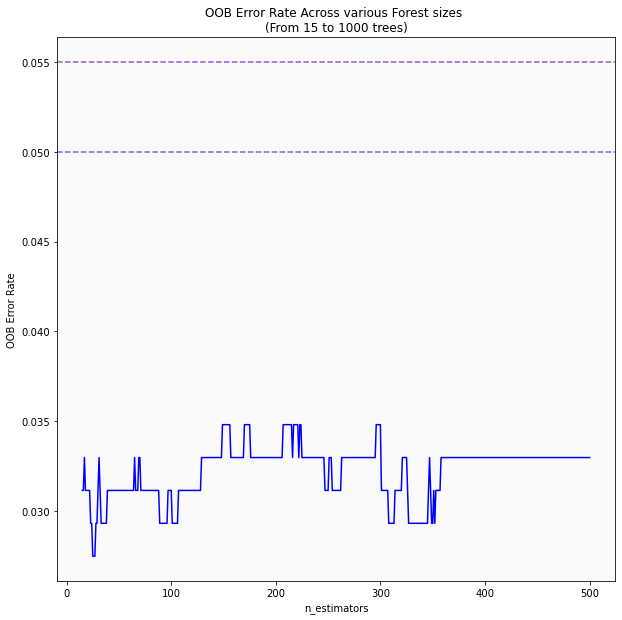

In [20]:
# Plotting the OOB_scores line graph: oob_error vs. n_estimators
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'blue')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

### References:

[1] https://cran.r-project.org/web/packages/bnclassify/vignettes/overview.pdf

[2] https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection

[3] C:/Users/HP6550b/Downloads/biomedinformatics-02-00022-v2%20(2).pdf

[4] https://www.tandfonline.com/doi/full/10.1080/21642583.2014.956265